In [1]:
car_img="car1.jpeg"

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [26]:
def read_img(path, grayscale=True):
    img=cv2.imread(path)
    if grayscale:
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray")
        return img
    color_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(color_img)
    return color_img
        

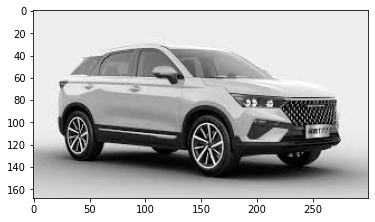

In [27]:
car=read_img(car_img, grayscale=True)

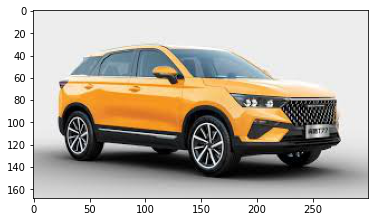

In [60]:
color_car=read_img(car_img, grayscale=False)

In [37]:
car.shape

(1, 168, 300, 1)

In [38]:
color_car.shape


(168, 300, 3)

(1, 168, 300, 3)

In [41]:
#(1,r,c,1)
_,row,col,_=car.shape
car=car.reshape(1,row,col,1)
car.shape

(1, 168, 300, 1)

In [42]:
# Define Convolution Layer
CONVO_LAYER=tf.keras.layers.Conv2D(filters=1,
                                   kernel_size=(3,3),
                                   strides=(1,1), 
                                   input_shape=car.shape[1:])
conv_model=tf.keras.Sequential(CONVO_LAYER)
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [44]:
out=conv_model.predict(car)

In [45]:
out.shape

(1, 166, 298, 1)

In [50]:
row,col=out.shape[1:-1]
reshape_out=out.reshape(row,col)

In [49]:
#_,row,col,_=out.shape
#out.reshape(row,col)

array([[459.06805, 459.06805, 459.06805, ..., 459.06805, 459.06805,
        459.06805],
       [459.06805, 459.06805, 459.06805, ..., 459.06805, 459.06805,
        459.06805],
       [459.06805, 459.06805, 459.06805, ..., 459.06805, 459.06805,
        459.06805],
       ...,
       [414.67654, 414.67654, 414.67654, ..., 404.43948, 404.43948,
        404.43948],
       [417.6427 , 417.6427 , 417.6427 , ..., 408.3135 , 408.3135 ,
        408.3135 ],
       [419.776  , 419.776  , 419.776  , ..., 411.83176, 411.83176,
        411.83176]], dtype=float32)

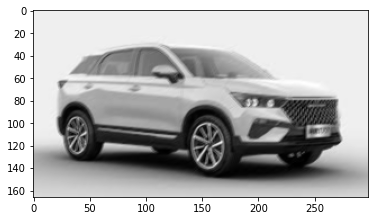

In [52]:
plt.imshow(reshape_out, cmap="gray")

In [61]:
row,col,depth=color_car.shape
color_car=color_car.reshape(1, row,col,depth)
color_car.shape

(1, 168, 300, 3)

In [63]:
CONVO_LAYER=[tf.keras.layers.Conv2D(filters=1, 
                                   kernel_size=(3,3),
                                   strides=(1,1),
                                   input_shape=color_car.shape[1:])]
conv_model=tf.keras.Sequential(CONVO_LAYER)
conv_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


# Try to display output for 5 filters

In [80]:
def reshapeing_in(img, grayscale=True):
    if grayscale:
        row,col=img.shape
        img_reshape=img.reshape(1, row,col,1)
        return img_reshape
    row,col,depth=img.shape
    color_img=img.reshape(1, row,col,depth)
    #plt.imshow(color_img)
    return color_img

def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None):
    CONV_LAYER=[tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=strides,
                                      input_shape=input_shape)]
    conv_model=tf.keras.Sequential(CONV_LAYER)
    conv_model.summary()
    return conv_model
def apply_conv_model_and_visualize(img, conv_model):
    try:
        out=conv_model.predict(img)
        row,col,depth=out.shape[1:]
        reshape_out=out.reshape(row,col,depth)
        for d in range(depth):
            plt.imshow(reshape_out[:,:,d], cmap="gray")
            plt.show()
        #plt.imshow(reshape_out, cmap="gray")
    except Exception as e:
        raise e

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


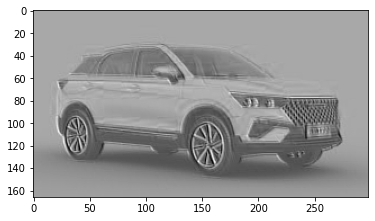

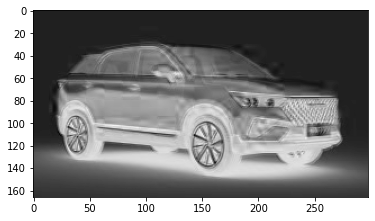

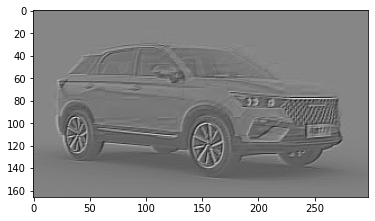

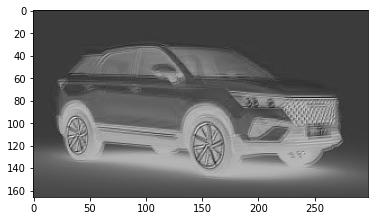

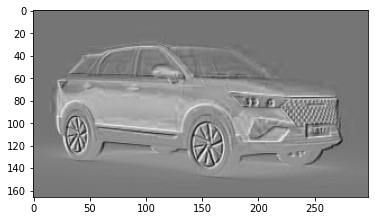

In [81]:
img=read_img(car_img, grayscale=False)
input_img=reshapeing_in(img, grayscale=False)
model=get_conv_model(filters=5,filter_size=(3,3),strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)